# Limits of Diversification

(including the anatomy *"internal working"* of a cap-weighted portfolio, and a bunch of cool Pandas stuff along the way)

In [1]:
%load_ext autoreload
%autoreload 2

import importlib, sys
import numpy as np
import pandas as pd

sys.path.insert(1, "../../week-one")

erk = importlib.import_module("edhec-risk-kit")

industry_returns = erk.get_industry_returns()

industry_returns

/Users/mac/Desktop/development/algo-trading/coursera/introduction-to-portfolio-construction-and-analysis-with-python/week-three/section-one/../../week-one/edhec-risk-kit.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industry_returns = pd.read_csv(


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.0056,-0.0519,0.0129,0.0293,0.1097,-0.0048,0.0808,0.0177,0.0814,0.0039,...,0.0083,0.0922,0.0206,0.0770,0.0193,-0.2379,0.0007,0.0187,0.0037,0.0520
1926-08,0.0259,0.2703,0.0650,0.0055,0.1001,-0.0358,-0.0251,0.0425,0.0550,0.0814,...,0.0217,0.0202,0.0439,-0.0238,0.0488,0.0539,-0.0075,-0.0013,0.0446,0.0676
1926-09,0.0116,0.0402,0.0126,0.0658,-0.0099,0.0073,-0.0051,0.0069,0.0533,0.0231,...,0.0241,0.0225,0.0019,-0.0554,0.0005,-0.0787,0.0025,-0.0056,-0.0123,-0.0386
1926-10,-0.0306,-0.0331,0.0106,-0.0476,0.0947,-0.0468,0.0012,-0.0057,-0.0476,0.0100,...,-0.0011,-0.0200,-0.0109,-0.0508,-0.0264,-0.1538,-0.0220,-0.0411,-0.0516,-0.0849
1926-11,0.0635,0.0729,0.0455,0.0166,-0.0580,-0.0054,0.0187,0.0542,0.0520,0.0311,...,0.0163,0.0377,0.0364,0.0384,0.0160,0.0467,0.0652,0.0433,0.0224,0.0400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348


In [2]:
industry_nfirms = erk.get_industry_nfirms()

industry_nfirms

/Users/mac/Desktop/development/algo-trading/coursera/introduction-to-portfolio-construction-and-analysis-with-python/week-three/section-one/../../week-one/edhec-risk-kit.py:87: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industry_nfirms = pd.read_csv(


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-08,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-09,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-10,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
1926-11,43,3,16,7,2,8,12,7,17,13,...,5,3,7,6,74,2,33,6,12,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,56,12,3,64,21,39,30,634,68,8,...,69,440,284,37,70,97,143,63,646,130
2018-09,56,12,3,64,21,39,30,632,68,8,...,69,440,282,37,70,97,143,62,643,130
2018-10,55,12,3,63,21,39,29,629,67,8,...,69,437,280,37,70,95,142,62,638,130
2018-11,55,11,3,62,21,39,29,626,66,8,...,69,434,280,36,69,95,141,61,635,128


In [3]:
industry_size = erk.get_industry_size()

industry_size

/Users/mac/Desktop/development/algo-trading/coursera/introduction-to-portfolio-construction-and-analysis-with-python/week-three/section-one/../../week-one/edhec-risk-kit.py:73: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  industry_size = pd.read_csv(


,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,35.98,7.12,59.72,26.41,12.02,22.27,18.36,25.52,57.59,6.18,...,350.36,13.60,56.70,35.35,66.91,1.19,46.65,10.82,18.83,24.25
1926-08,36.10,6.75,60.47,27.17,13.33,22.13,19.83,25.80,62.13,6.20,...,353.27,14.75,57.74,37.86,67.99,0.90,46.57,11.00,18.88,25.51
1926-09,37.00,8.58,64.03,27.30,14.67,21.18,19.29,26.73,65.53,6.71,...,360.96,15.05,59.61,36.82,71.02,0.95,46.11,10.94,19.67,27.21
1926-10,37.14,8.92,64.42,28.76,14.42,21.23,19.03,26.87,68.47,6.82,...,364.16,15.30,59.52,34.77,70.83,0.88,46.15,10.80,19.36,26.16
1926-11,35.88,8.62,65.08,27.38,15.79,20.14,19.03,26.54,65.06,6.84,...,363.74,14.89,58.74,32.80,68.75,0.74,45.03,10.33,18.35,23.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,11697.98,20738.70,82083.79,5614.41,1666.00,11188.09,9703.80,4891.61,7750.06,2307.51,...,17316.92,10961.79,11431.81,8167.26,10034.30,3392.45,15964.58,6806.11,7632.93,11015.79
2018-09,11624.31,20332.85,77629.48,5773.17,1587.92,11463.79,10199.85,5115.56,7726.66,2394.61,...,17816.83,11522.53,12631.96,8103.55,10292.17,3511.81,17387.93,7135.07,7834.57,11334.95
2018-10,11614.93,20256.16,80703.59,5816.00,1549.21,11579.42,10661.35,5228.28,6901.05,2241.00,...,18118.32,11540.36,12666.71,8064.22,10395.22,3476.28,17611.78,7312.36,7727.88,11453.54
2018-11,11721.21,21743.93,87079.79,4962.71,1444.47,11460.11,9579.97,4777.85,6113.67,1663.11,...,17934.51,10505.66,11635.87,7379.17,9513.99,3198.05,15917.02,7298.54,7217.76,10931.44


In [4]:
print(industry_size.shape)
print(industry_nfirms.shape)
print(industry_returns.shape)

(1110, 30)
(1110, 30)
(1110, 30)


##### Market cap

This is the number of shares outstanding (in circulation) multiplied by the price of the stock.

In [5]:
industry_marketcap = industry_nfirms * industry_size

industry_marketcap

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,1547.14,21.36,955.52,184.87,24.04,178.16,220.32,178.64,979.03,80.34,...,1751.80,40.80,396.90,212.10,4951.34,2.38,1539.45,64.92,225.96,97.00
1926-08,1552.30,20.25,967.52,190.19,26.66,177.04,237.96,180.60,1056.21,80.60,...,1766.35,44.25,404.18,227.16,5031.26,1.80,1536.81,66.00,226.56,102.04
1926-09,1591.00,25.74,1024.48,191.10,29.34,169.44,231.48,187.11,1114.01,87.23,...,1804.80,45.15,417.27,220.92,5255.48,1.90,1521.63,65.64,236.04,108.84
1926-10,1597.02,26.76,1030.72,201.32,28.84,169.84,228.36,188.09,1163.99,88.66,...,1820.80,45.90,416.64,208.62,5241.42,1.76,1522.95,64.80,232.32,104.64
1926-11,1542.84,25.86,1041.28,191.66,31.58,161.12,228.36,185.78,1106.02,88.92,...,1818.70,44.67,411.18,196.80,5087.50,1.48,1485.99,61.98,220.20,95.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,655086.88,248864.40,246251.37,359322.24,34986.00,436335.51,291114.00,3101280.74,527004.08,18460.08,...,1194867.48,4823187.60,3246634.04,302188.62,702401.00,329067.65,2282934.94,428784.93,4930872.78,1432052.70
2018-09,650961.36,243994.20,232888.44,369482.88,33346.32,447087.81,305995.50,3233033.92,525412.88,19156.88,...,1229361.27,5069913.20,3562212.72,299831.35,720451.90,340645.57,2486473.99,442374.34,5037628.51,1473543.50
2018-10,638821.15,243073.92,242110.77,366408.00,32533.41,451597.38,309179.15,3288588.12,462370.35,17928.00,...,1250164.08,5043137.32,3546678.80,298376.14,727665.40,330246.60,2500872.76,453366.32,4930387.44,1488960.20
2018-11,644666.55,239183.23,261239.37,307688.02,30333.87,446944.29,277819.13,2990934.10,403502.22,13304.88,...,1237481.19,4559456.44,3258043.60,265650.12,656465.31,303814.75,2244299.82,445210.94,4583277.60,1399224.32


In [6]:
total_marketcap = industry_marketcap.sum(axis=1)

total_marketcap

1926-07       26657.94
1926-08       27436.34
1926-09       28060.41
1926-10       28057.23
1926-11       27198.40
              ...     
2018-08    29949911.36
2018-09    30990177.46
2018-10    30918505.63
2018-11    28463290.74
2018-12    28851651.12
Freq: M, Length: 1110, dtype: float64

<Axes: >

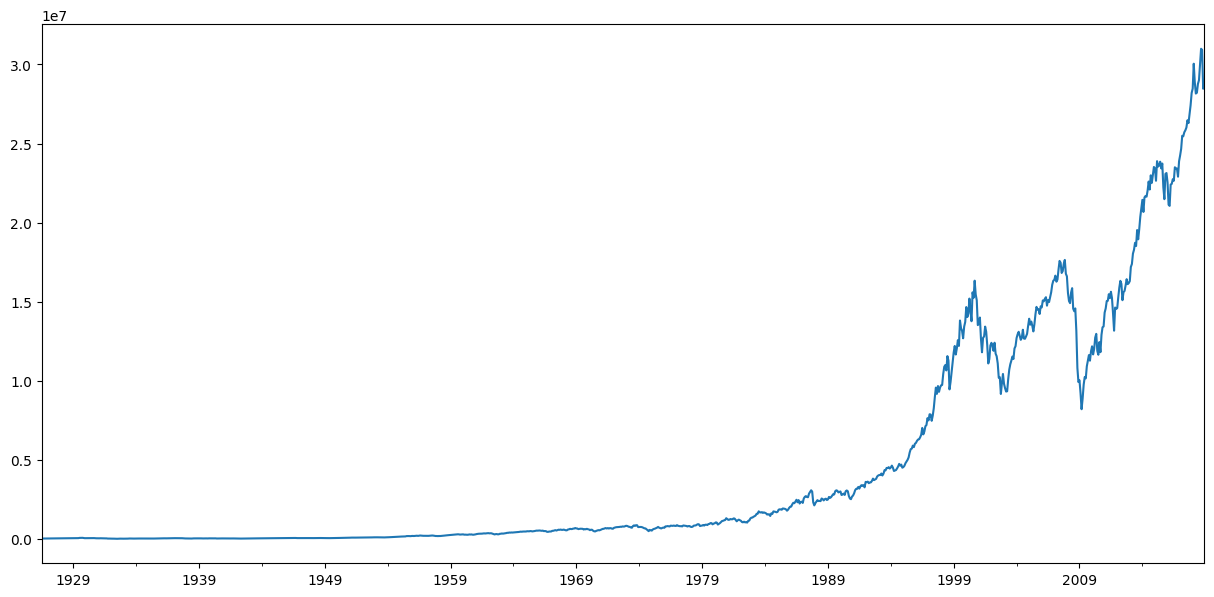

In [7]:
total_marketcap.plot(figsize=(15, 7))

In [8]:
industry_cap_weight = industry_marketcap.div(total_marketcap, axis=0)

industry_cap_weight

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
1926-07,0.058037,0.000801,0.035844,0.006935,0.000902,0.006683,0.008265,0.006701,0.036726,0.003014,...,0.065714,0.001531,0.014889,0.007956,0.185736,0.000089,0.057748,0.002435,0.008476,0.003639
1926-08,0.056578,0.000738,0.035264,0.006932,0.000972,0.006453,0.008673,0.006583,0.038497,0.002938,...,0.064380,0.001613,0.014732,0.008280,0.183379,0.000066,0.056014,0.002406,0.008258,0.003719
1926-09,0.056699,0.000917,0.036510,0.006810,0.001046,0.006038,0.008249,0.006668,0.039700,0.003109,...,0.064318,0.001609,0.014870,0.007873,0.187292,0.000068,0.054227,0.002339,0.008412,0.003879
1926-10,0.056920,0.000954,0.036736,0.007175,0.001028,0.006053,0.008139,0.006704,0.041486,0.003160,...,0.064896,0.001636,0.014850,0.007436,0.186812,0.000063,0.054280,0.002310,0.008280,0.003730
1926-11,0.056725,0.000951,0.038285,0.007047,0.001161,0.005924,0.008396,0.006831,0.040665,0.003269,...,0.066868,0.001642,0.015118,0.007236,0.187051,0.000054,0.054635,0.002279,0.008096,0.003521
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08,0.021873,0.008309,0.008222,0.011997,0.001168,0.014569,0.009720,0.103549,0.017596,0.000616,...,0.039896,0.161042,0.108402,0.010090,0.023453,0.010987,0.076225,0.014317,0.164637,0.047815
2018-09,0.021005,0.007873,0.007515,0.011923,0.001076,0.014427,0.009874,0.104324,0.016954,0.000618,...,0.039669,0.163597,0.114947,0.009675,0.023248,0.010992,0.080234,0.014275,0.162556,0.047549
2018-10,0.020661,0.007862,0.007831,0.011851,0.001052,0.014606,0.010000,0.106363,0.014954,0.000580,...,0.040434,0.163111,0.114711,0.009650,0.023535,0.010681,0.080886,0.014663,0.159464,0.048158
2018-11,0.022649,0.008403,0.009178,0.010810,0.001066,0.015702,0.009761,0.105080,0.014176,0.000467,...,0.043476,0.160187,0.114465,0.009333,0.023064,0.010674,0.078849,0.015642,0.161024,0.049159


In [9]:
industry_cap_weight.loc["1926"].sum(axis=1)

1926-07    1.0
1926-08    1.0
1926-09    1.0
1926-10    1.0
1926-11    1.0
1926-12    1.0
Freq: M, dtype: float64

<Axes: >

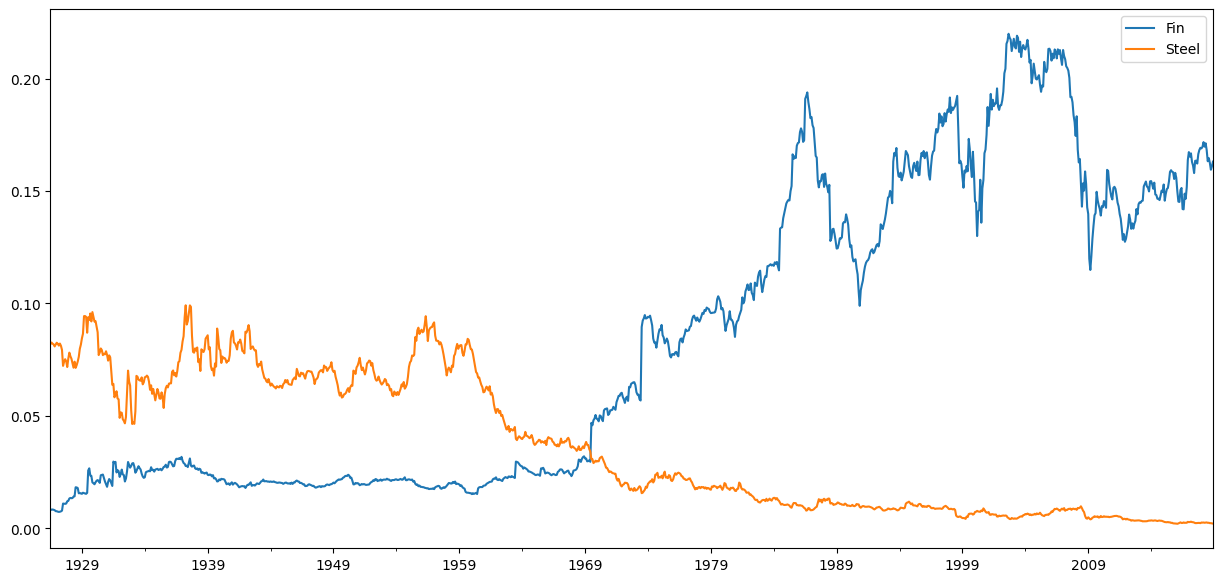

In [10]:
industry_cap_weight[["Fin", "Steel"]].plot(figsize=(15, 7))

In [11]:
total_market_return = (industry_cap_weight * industry_returns).sum(axis=1)

total_market_return

1926-07    0.031375
1926-08    0.028957
1926-09    0.005566
1926-10   -0.028504
1926-11    0.028039
             ...   
2018-08    0.036951
2018-09    0.002108
2018-10   -0.074292
2018-11    0.019003
2018-12   -0.092911
Freq: M, Length: 1110, dtype: float64

<Axes: >

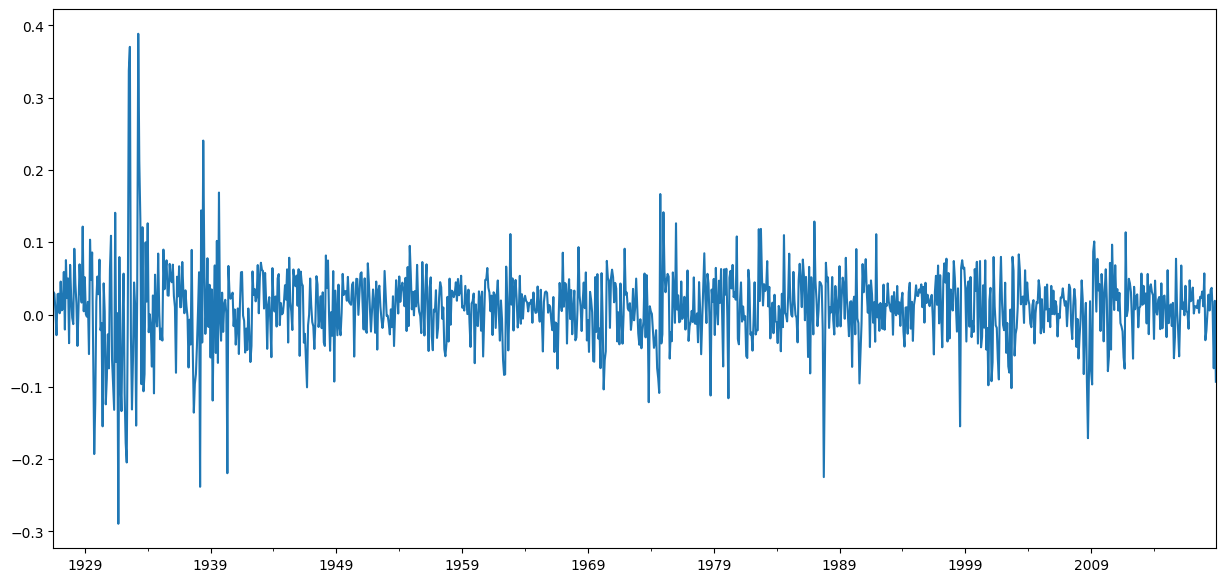

In [12]:
total_market_return.plot(figsize=(15, 7))

<Axes: title={'center': 'Total Market CapWeighted Index 1926-2018'}>

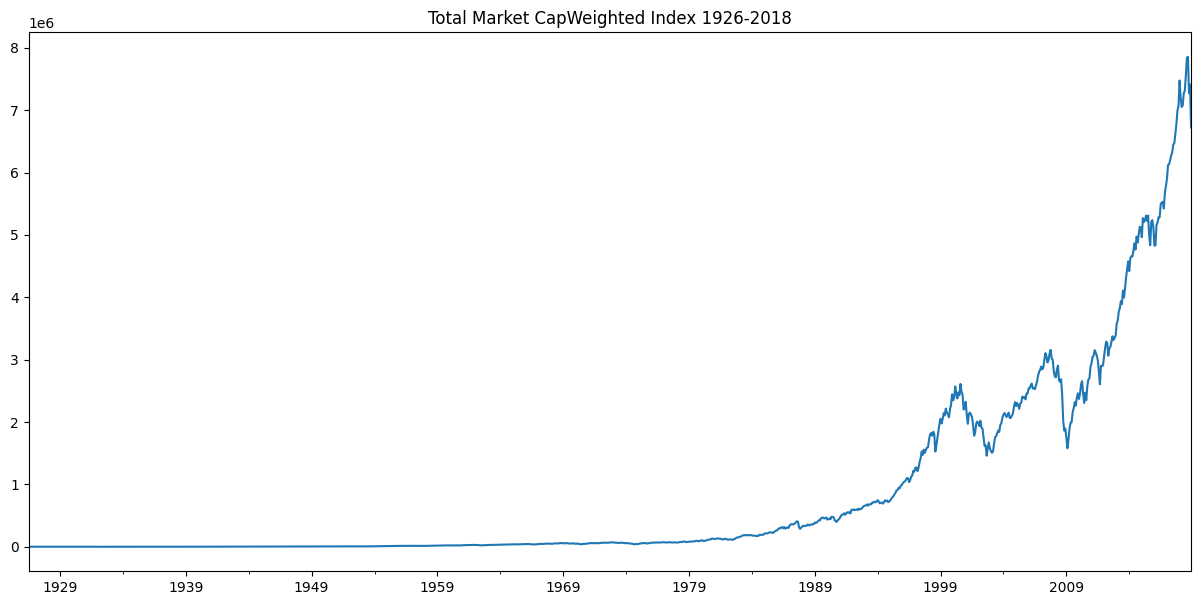

In [13]:
total_market_index = erk.create_drawdown(total_market_return)["Wealth Index"]

total_market_index.plot(figsize=(15, 7), title="Total Market CapWeighted Index 1926-2018")

<Axes: >

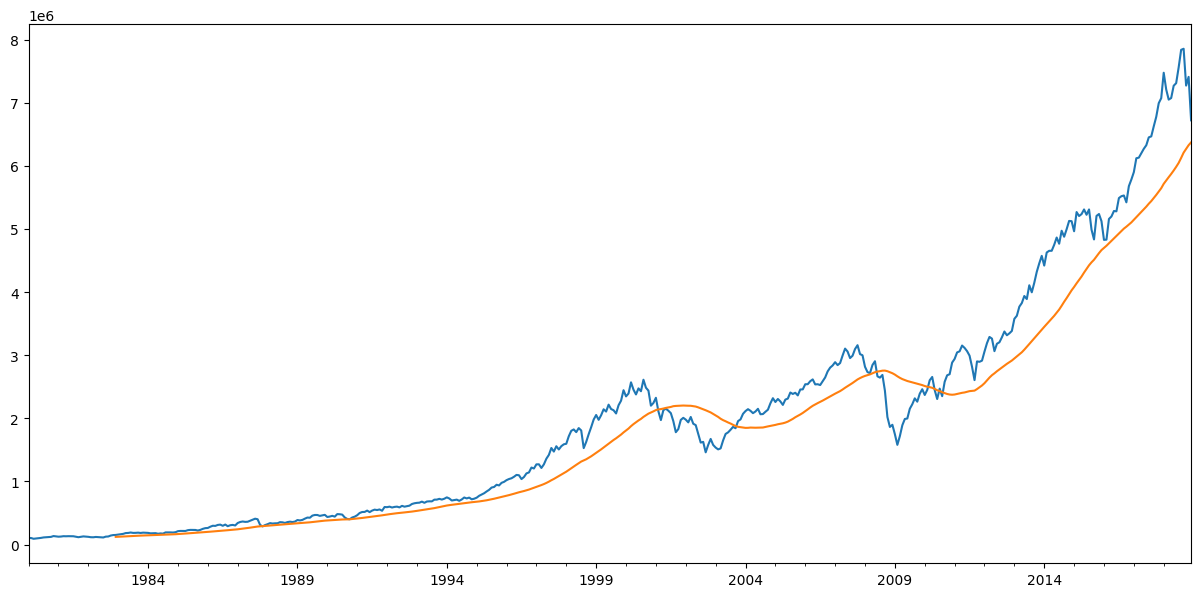

In [14]:
total_market_index["1980":].plot(figsize=(15, 7))
total_market_index["1980":].rolling(window=36).mean().plot(figsize=(15, 7))

In [15]:
trailing_36_months_return = total_market_return.rolling(window=36).aggregate(erk.annualize_returns, 12)

trailing_36_months_return

1926-07         NaN
1926-08         NaN
1926-09         NaN
1926-10         NaN
1926-11         NaN
             ...   
2018-08    0.162543
2018-09    0.175679
2018-10    0.117769
2018-11    0.122645
2018-12    0.094723
Freq: M, Length: 1110, dtype: float64

<Axes: >

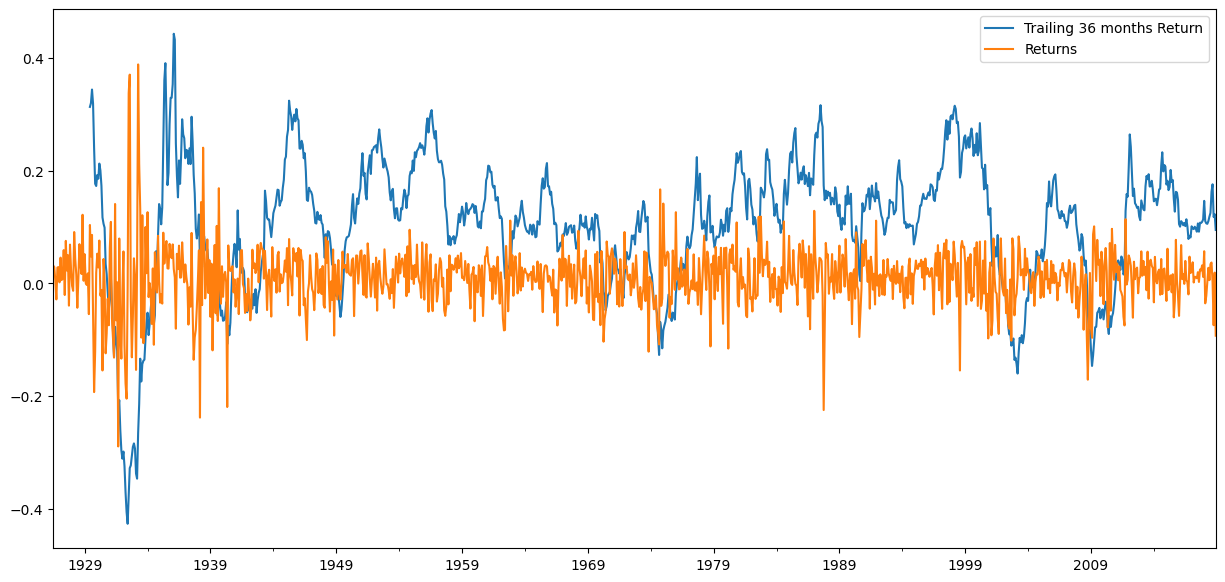

In [16]:
trailing_36_months_return.plot(figsize=(15, 7), label="Trailing 36 months Return", legend=True)
total_market_return.plot(label="Returns", legend=True)

### Rolling Correlation - along with MultiIndexes and `.groupby`

In [17]:
ts_corr = industry_returns.rolling(window=36).corr()

ts_corr

Food      Beer     Smoke     Games     Books     Hshld  \
1926-07 Food        NaN       NaN       NaN       NaN       NaN       NaN   
        Beer        NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke       NaN       NaN       NaN       NaN       NaN       NaN   
        Games       NaN       NaN       NaN       NaN       NaN       NaN   
        Books       NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
1926-07 Food        NaN       NaN       NaN       NaN  ...       NaN   
        Beer        NaN       NaN       NaN       NaN  ...       NaN   
        Smoke       NaN       NaN       NaN       NaN  ...       NaN   
        Games       NaN       NaN       NaN       NaN  ...       NaN   
        Books       NaN       NaN       NaN       NaN  ...       NaN   
...                 ...       ...       ...       ...  ...       ...   
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
1926-07 Food        NaN       NaN       NaN       NaN       NaN       NaN   
        Beer        NaN       NaN       NaN       NaN       NaN       NaN   
        Smoke       NaN       NaN       NaN       NaN       NaN       NaN   
        Games       NaN       NaN       NaN       NaN       NaN       NaN   
        Books       NaN       NaN       NaN       NaN       NaN       NaN   
...                 ...       ...       ...       ...       ...       ...   
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
1926-07 Food        NaN       NaN       NaN  
        Beer        NaN       NaN       NaN  
        Smoke       NaN       NaN       NaN  
        Games       NaN       NaN       NaN  
        Books       NaN       NaN       NaN  
...                 ...       ...       ...  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[33300 rows x 30 columns]

In [18]:
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
2018-12 Whlsl  0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail  0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals  0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin    0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other  0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                  Clths      Hlth     Chems     Txtls  ...     Telcm  \
2018-12 Whlsl  0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail  0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals  0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin    0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other  0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                  Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
2018-12 Whlsl  0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail  0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals  0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin    0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other  0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                  Meals       Fin     Other  
2018-12 Whlsl  0.643879  0.746480  0.767652  
        Rtail  0.616947  0.611883  0.619918  
        Meals  1.000000  0.502563  0.605226  
        Fin    0.502563  1.000000  0.734837  
        Other  0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [19]:
industry_returns.tail()

,Food,Beer,Smoke,Games,Books,Hshld,Clths,Hlth,Chems,Txtls,...,Telcm,Servs,BusEq,Paper,Trans,Whlsl,Rtail,Meals,Fin,Other
2018-08,-0.0038,-0.0186,-0.0543,0.0289,-0.0447,0.0254,0.0526,0.0446,0.0001,0.0380,...,0.0295,0.0524,0.0993,-0.0034,0.0291,0.0366,0.0911,0.0364,0.0245,0.0299
2018-09,-0.0032,0.0019,0.0537,-0.0009,-0.0221,0.0107,0.0130,0.0199,-0.0287,-0.0638,...,0.0174,-0.0037,-0.0033,-0.0030,0.0105,-0.0148,0.0061,0.0251,-0.0193,0.0116
2018-10,0.0102,-0.0157,0.0790,-0.1596,-0.0666,-0.0051,-0.1014,-0.0884,-0.1250,-0.2579,...,-0.0050,-0.0920,-0.0806,-0.0982,-0.0975,-0.0788,-0.1021,-0.0171,-0.0545,-0.0599
2018-11,0.0272,0.0579,-0.0843,-0.0065,0.0325,0.0644,-0.0099,0.0632,0.0496,0.0292,...,0.0254,0.0129,-0.0505,0.0822,0.0617,0.0318,0.0159,0.0616,0.0289,0.0348
2018-12,-0.0973,-0.0969,-0.1580,-0.0824,-0.1535,-0.0557,-0.0728,-0.0840,-0.0776,-0.1009,...,-0.0884,-0.0765,-0.0923,-0.0863,-0.1519,-0.1121,-0.0919,-0.0628,-0.1144,-0.0693


In [20]:
ts_corr.index.names

FrozenList([None, None])

In [21]:
ts_corr.index.names = ["Date", "Industry"]

ts_corr.index

MultiIndex([('1926-07',  'Food'),
            ('1926-07',  'Beer'),
            ('1926-07', 'Smoke'),
            ('1926-07', 'Games'),
            ('1926-07', 'Books'),
            ('1926-07', 'Hshld'),
            ('1926-07', 'Clths'),
            ('1926-07',  'Hlth'),
            ('1926-07', 'Chems'),
            ('1926-07', 'Txtls'),
            ...
            ('2018-12', 'Telcm'),
            ('2018-12', 'Servs'),
            ('2018-12', 'BusEq'),
            ('2018-12', 'Paper'),
            ('2018-12', 'Trans'),
            ('2018-12', 'Whlsl'),
            ('2018-12', 'Rtail'),
            ('2018-12', 'Meals'),
            ('2018-12',   'Fin'),
            ('2018-12', 'Other')],
           names=['Date', 'Industry'], length=33300)

In [22]:
ts_corr.tail()

Food      Beer     Smoke     Games     Books     Hshld  \
Date    Industry                                                               
2018-12 Whlsl     0.474948  0.356983  0.122672  0.510425  0.803362  0.419280   
        Rtail     0.517856  0.406107  0.030283  0.676464  0.636320  0.358336   
        Meals     0.370187  0.385483  0.122007  0.301516  0.520649  0.308216   
        Fin       0.298823  0.192706  0.027593  0.480276  0.694812  0.162690   
        Other     0.436952  0.376565  0.224010  0.331829  0.558072  0.390610   

                     Clths      Hlth     Chems     Txtls  ...     Telcm  \
Date    Industry                                          ...             
2018-12 Whlsl     0.570071  0.739764  0.785796  0.634197  ...  0.648092   
        Rtail     0.676598  0.714933  0.626034  0.634202  ...  0.562238   
        Meals     0.302176  0.416193  0.520023  0.491726  ...  0.406184   
        Fin       0.425899  0.658468  0.760151  0.577090  ...  0.420863   
        Other     0.467099  0.645035  0.712511  0.520953  ...  0.607868   

                     Servs     BusEq     Paper     Trans     Whlsl     Rtail  \
Date    Industry                                                               
2018-12 Whlsl     0.567395  0.543362  0.764252  0.829185  1.000000  0.744842   
        Rtail     0.762616  0.628246  0.656510  0.630615  0.744842  1.000000   
        Meals     0.444629  0.399438  0.627113  0.663358  0.643879  0.616947   
        Fin       0.585418  0.517947  0.670936  0.760730  0.746480  0.611883   
        Other     0.460322  0.434487  0.773798  0.756961  0.767652  0.619918   

                     Meals       Fin     Other  
Date    Industry                                
2018-12 Whlsl     0.643879  0.746480  0.767652  
        Rtail     0.616947  0.611883  0.619918  
        Meals     1.000000  0.502563  0.605226  
        Fin       0.502563  1.000000  0.734837  
        Other     0.605226  0.734837  1.000000  

[5 rows x 30 columns]

In [23]:
trailing_36_months_correlation = ts_corr.groupby(level='Date').apply(
    lambda correlation_matrix: correlation_matrix.values.mean())

trailing_36_months_correlation

Date
1926-07         NaN
1926-08         NaN
1926-09         NaN
1926-10         NaN
1926-11         NaN
             ...   
2018-08    0.416673
2018-09    0.401186
2018-10    0.409397
2018-11    0.403975
2018-12    0.479502
Freq: M, Length: 1110, dtype: float64

<Axes: xlabel='Date'>

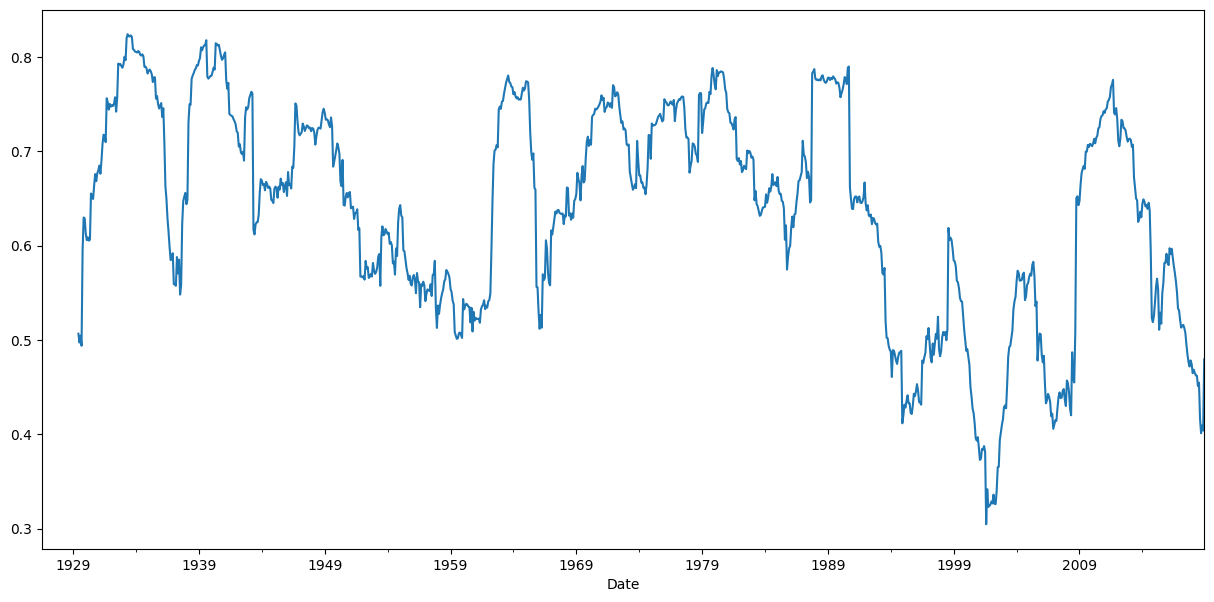

In [24]:
trailing_36_months_correlation.plot(figsize=(15, 7))

<Axes: xlabel='Date'>

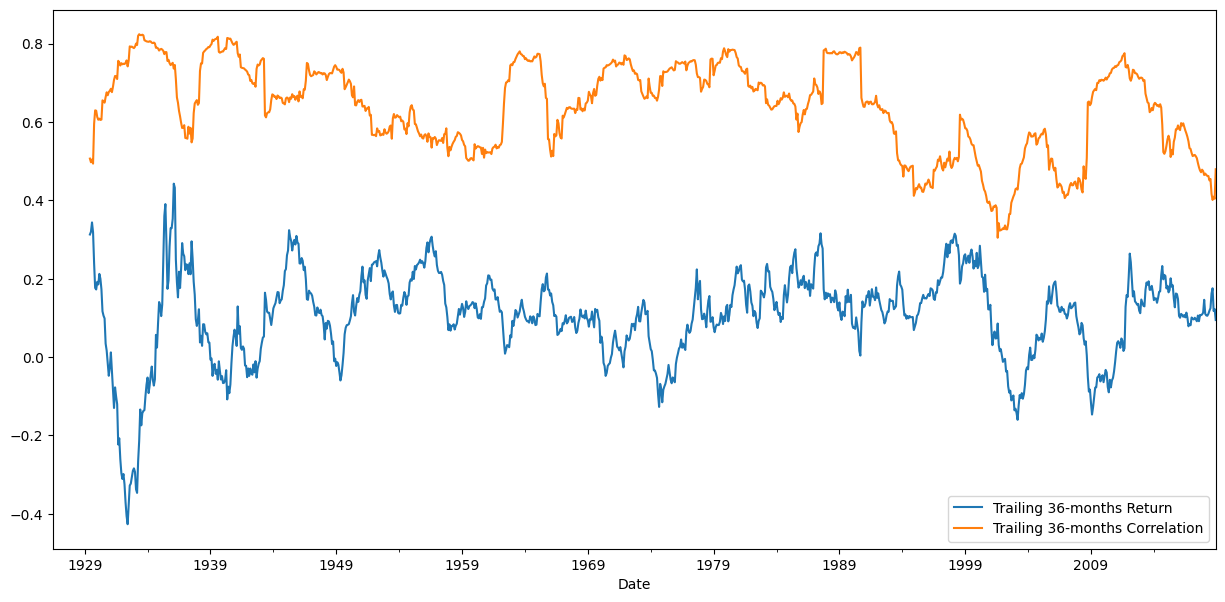

In [25]:
trailing_36_months_return.plot(figsize=(15, 7), label="Trailing 36-months Return", legend=True)
trailing_36_months_correlation.plot(label="Trailing 36-months Correlation", legend=True)

#### When market is crashing, correlation rises

Correlation of stocks increases as Market crashes making diversification unattractive during downturns in the market.

<Axes: >

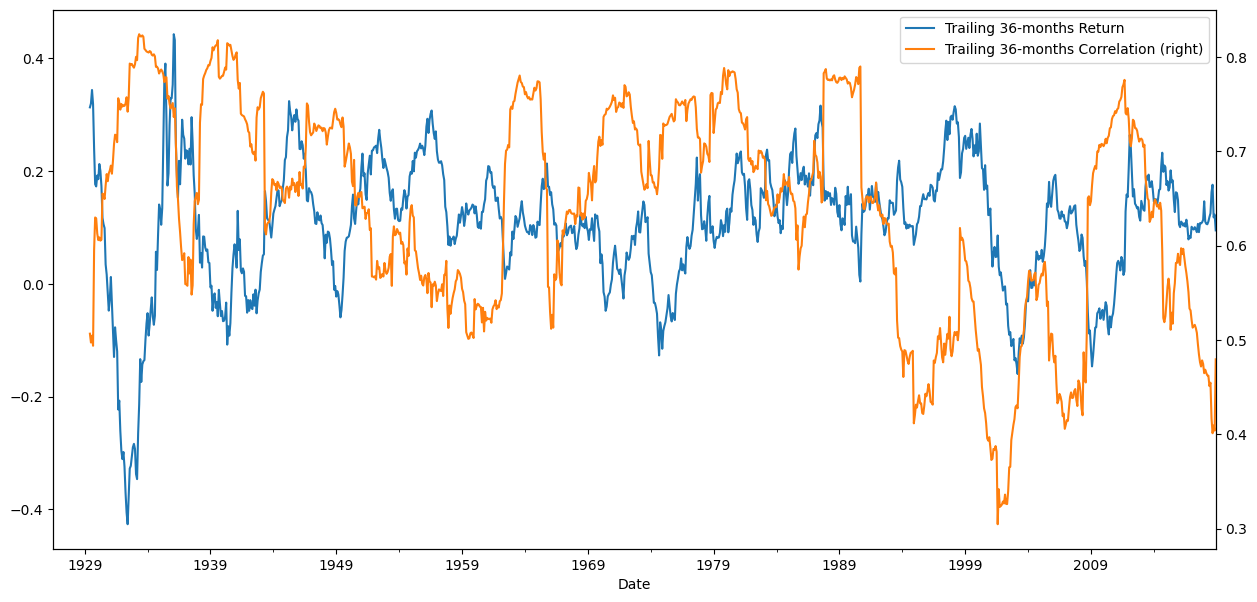

In [26]:
trailing_36_months_return.plot(
    figsize=(15, 7), label="Trailing 36-months Return", legend=True)
trailing_36_months_correlation.plot(
    label="Trailing 36-months Correlation", legend=True, secondary_y=True)

<Axes: >

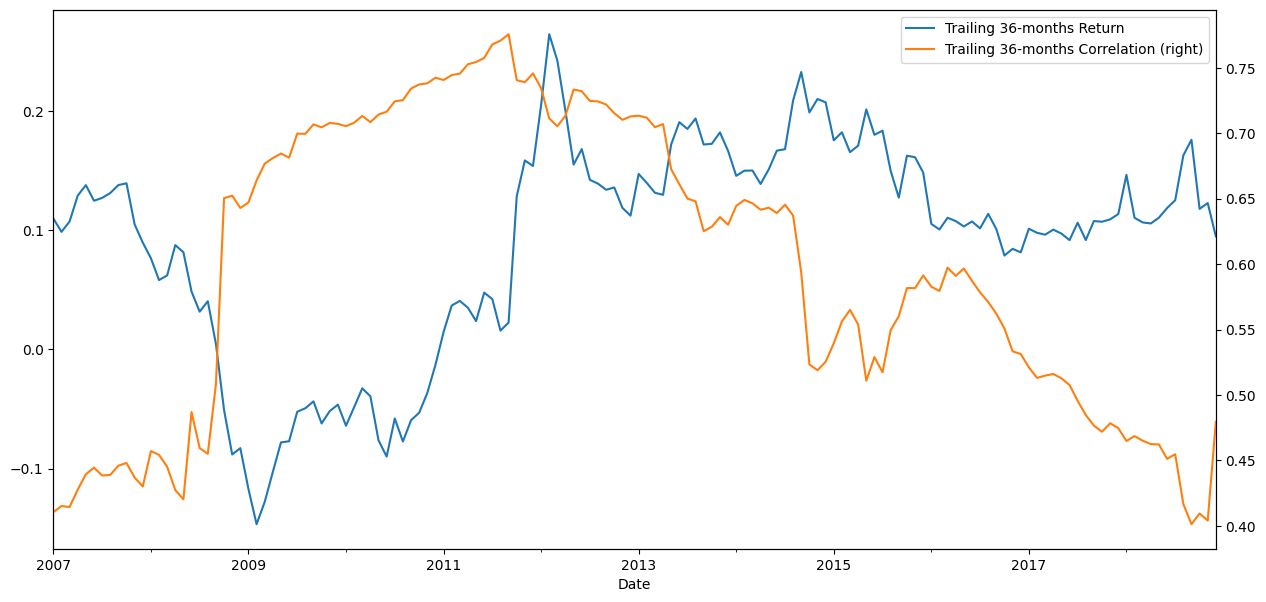

In [27]:
trailing_36_months_return["2007":].plot(
    figsize=(15, 7), label="Trailing 36-months Return", legend=True)
trailing_36_months_correlation["2007":].plot(
    label="Trailing 36-months Correlation", legend=True, secondary_y=True)

In [28]:
trailing_36_months_return.corr(trailing_36_months_correlation)

-0.28010065062884026